In [2]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df_energia_2021 = pd.read_csv("../input/energia_202109-202112.csv", encoding='latin-1')
df_energia_2022 = pd.read_csv('../input/energia_202201-202212.csv',encoding='latin-1')
df_energia_2023 = pd.read_csv('../input/energia_202301-202304.csv',encoding='latin-1')

In [4]:
merged_dataset = pd.concat([df_energia_2021, df_energia_2022, df_energia_2023])

In [5]:
num_entries_dataset = len(merged_dataset)
print(f"O conjunto de dados tem {num_entries_dataset} entradas.")

O conjunto de dados tem 13272 entradas.


In [6]:
print(merged_dataset.isnull().sum())

Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)      10033
dtype: int64


In [7]:
merged_dataset.rename(columns={"Hora": "hora", "Normal (kWh)": "normal", "Horário Económico (kWh)": "horario", "Autoconsumo (kWh)": "autoconsumo"}, inplace=True)

<Figure size 1200x600 with 0 Axes>

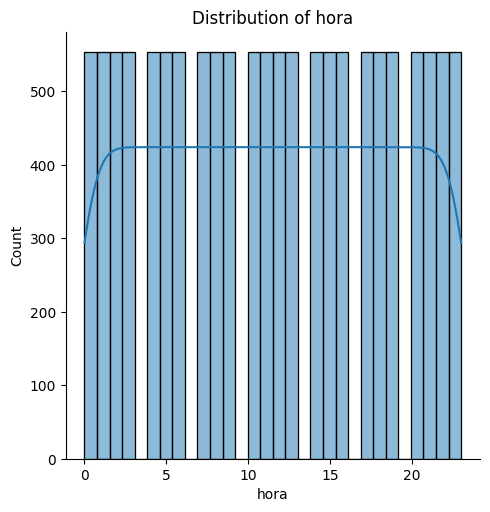

<Figure size 1200x600 with 0 Axes>

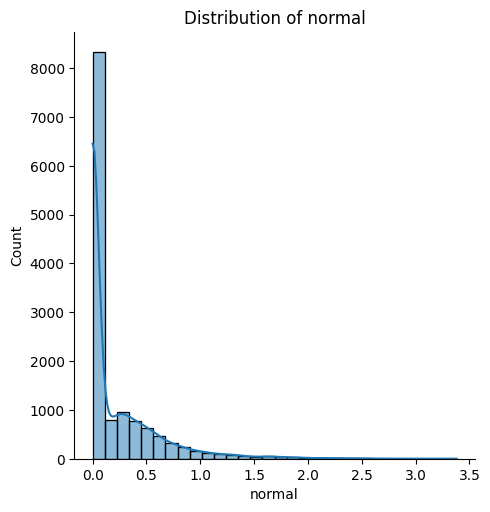

<Figure size 1200x600 with 0 Axes>

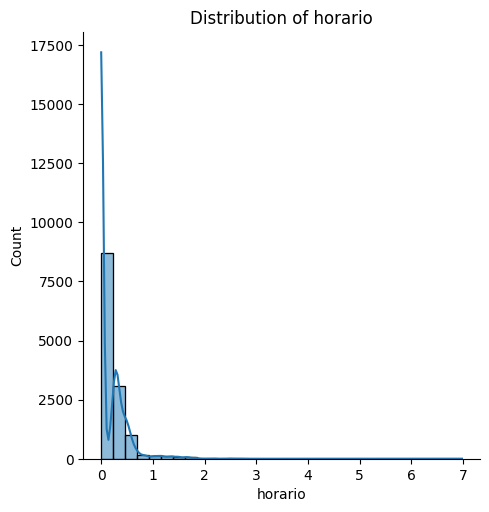

<Figure size 1200x600 with 0 Axes>

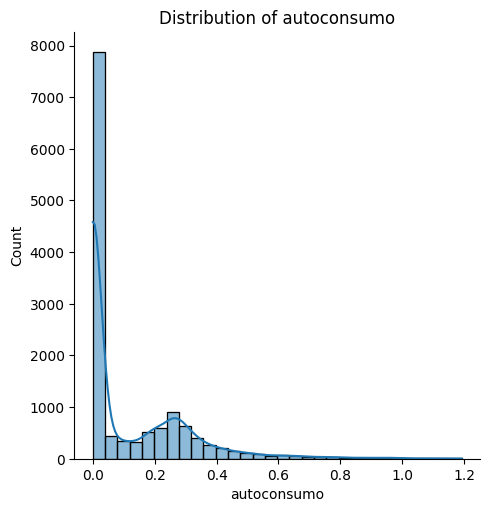

In [8]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    plt.figure(figsize=(12, 6))
    sns.displot(merged_dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [9]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    print(f"{col} : {merged_dataset[col].skew()}")


hora : 0.0
normal : 2.6030425469302245
horario : 3.582323936174385
autoconsumo : 1.889246604545493


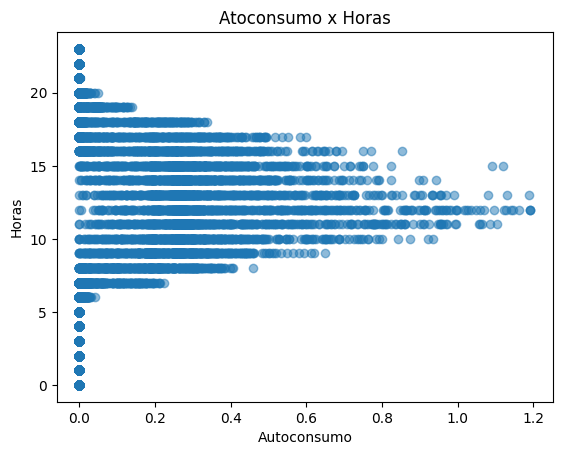

In [10]:
plt.scatter(merged_dataset['autoconsumo'], merged_dataset['hora'], alpha=0.5)

plt.xlabel('Autoconsumo')
plt.ylabel('Horas')
plt.title('Atoconsumo x Horas')

plt.show()

In [11]:
nbins = 6

scaler = StandardScaler()

# Normalização z-scalling porque hora tem dist. normal
# flatten para converter array bi-dimensional em array unidimensional
hours_avg_autoconsume_map = merged_dataset.groupby('hora')['autoconsumo'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

bins = pd.cut(merged_dataset['hora'], bins=nbins, labels=False, include_lowest=True)

merged_dataset['hora_Bin'] = bins

print(merged_dataset[['hora', 'autoconsumo', 'hora_Bin']])

for i in range(nbins):
    values_in_bin = merged_dataset.loc[merged_dataset['hora_Bin'] == i, 'hora']
    print(f'Bin {i + 1} - {values_in_bin.values}')


      hora  autoconsumo  hora_Bin
0        0        0.000         0
1        1        0.000         0
2        2        0.000         0
3        3        0.000         0
4        4        0.000         1
...    ...          ...       ...
2251    19        0.012         4
2252    20        0.000         5
2253    21        0.000         5
2254    22        0.000         5
2255    23        0.000         5

[13272 rows x 3 columns]
Bin 1 - [0 1 2 ... 1 2 3]
Bin 2 - [4 5 6 ... 5 6 7]
Bin 3 - [ 8  9 10 ...  9 10 11]
Bin 4 - [12 13 14 ... 13 14 15]
Bin 5 - [16 17 18 ... 17 18 19]
Bin 6 - [20 21 22 ... 21 22 23]


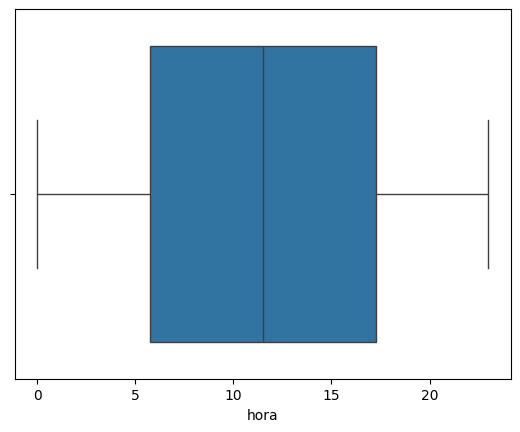

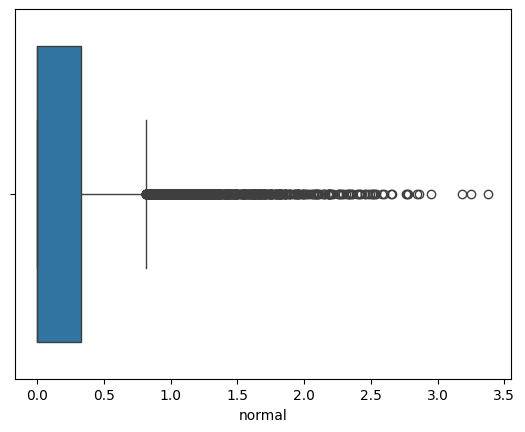

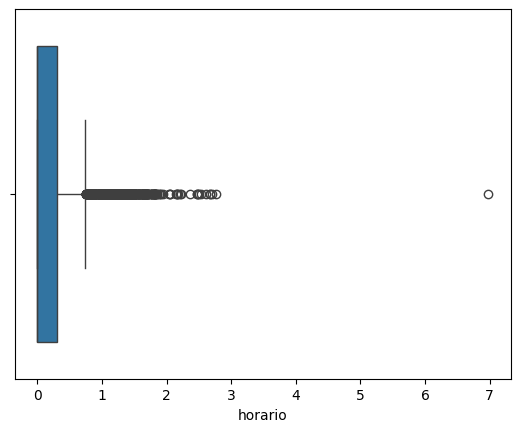

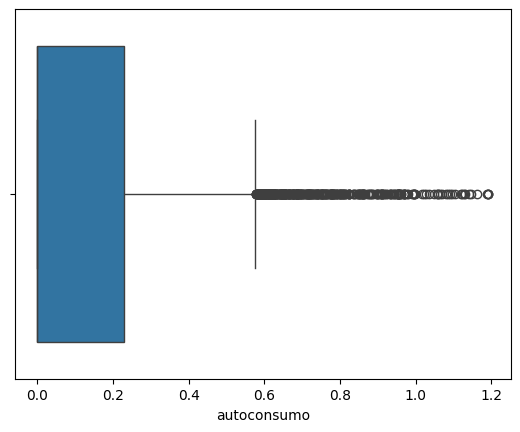

In [12]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    sns.boxplot(x=merged_dataset[col])
    plt.show()

In [13]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    z_scores = stats.zscore(merged_dataset[col])
    outliers = (z_scores > 3) | (z_scores < -3)

    outlier_values = merged_dataset[col][outliers]
    print("Valores de Outliers:", outlier_values)

Valores de Outliers: Series([], Name: hora, dtype: int64)
Valores de Outliers: 451     2.077
642     1.564
643     1.952
743     1.342
780     1.888
        ...  
2012    1.995
2098    1.425
2154    1.431
2203    1.950
2227    2.651
Name: normal, Length: 298, dtype: float64
Valores de Outliers: 984     1.190
991     1.134
1015    1.797
1039    1.874
1063    1.451
        ...  
2071    1.705
2095    1.371
2119    1.197
2207    1.275
2215    1.632
Name: horario, Length: 297, dtype: float64
Valores de Outliers: 276     1.016
924     0.738
948     0.954
949     0.685
1043    0.779
        ...  
2151    0.674
2194    0.843
2195    1.060
2196    1.161
2197    0.790
Name: autoconsumo, Length: 247, dtype: float64


In [14]:
merged_dataset = merged_dataset[~outliers]

In [15]:
num_entries_dataset = len(merged_dataset)
print(f"O conjunto de dados tem {num_entries_dataset} entradas.")


O conjunto de dados tem 13025 entradas.


In [16]:
cols = ['normal', 'horario', 'autoconsumo']

for col in cols:
    atributo_values = merged_dataset[col].values.reshape(-1, 1) 

    scaler = MinMaxScaler()

    merged_dataset[col + '_normalized'] = scaler.fit_transform(atributo_values)

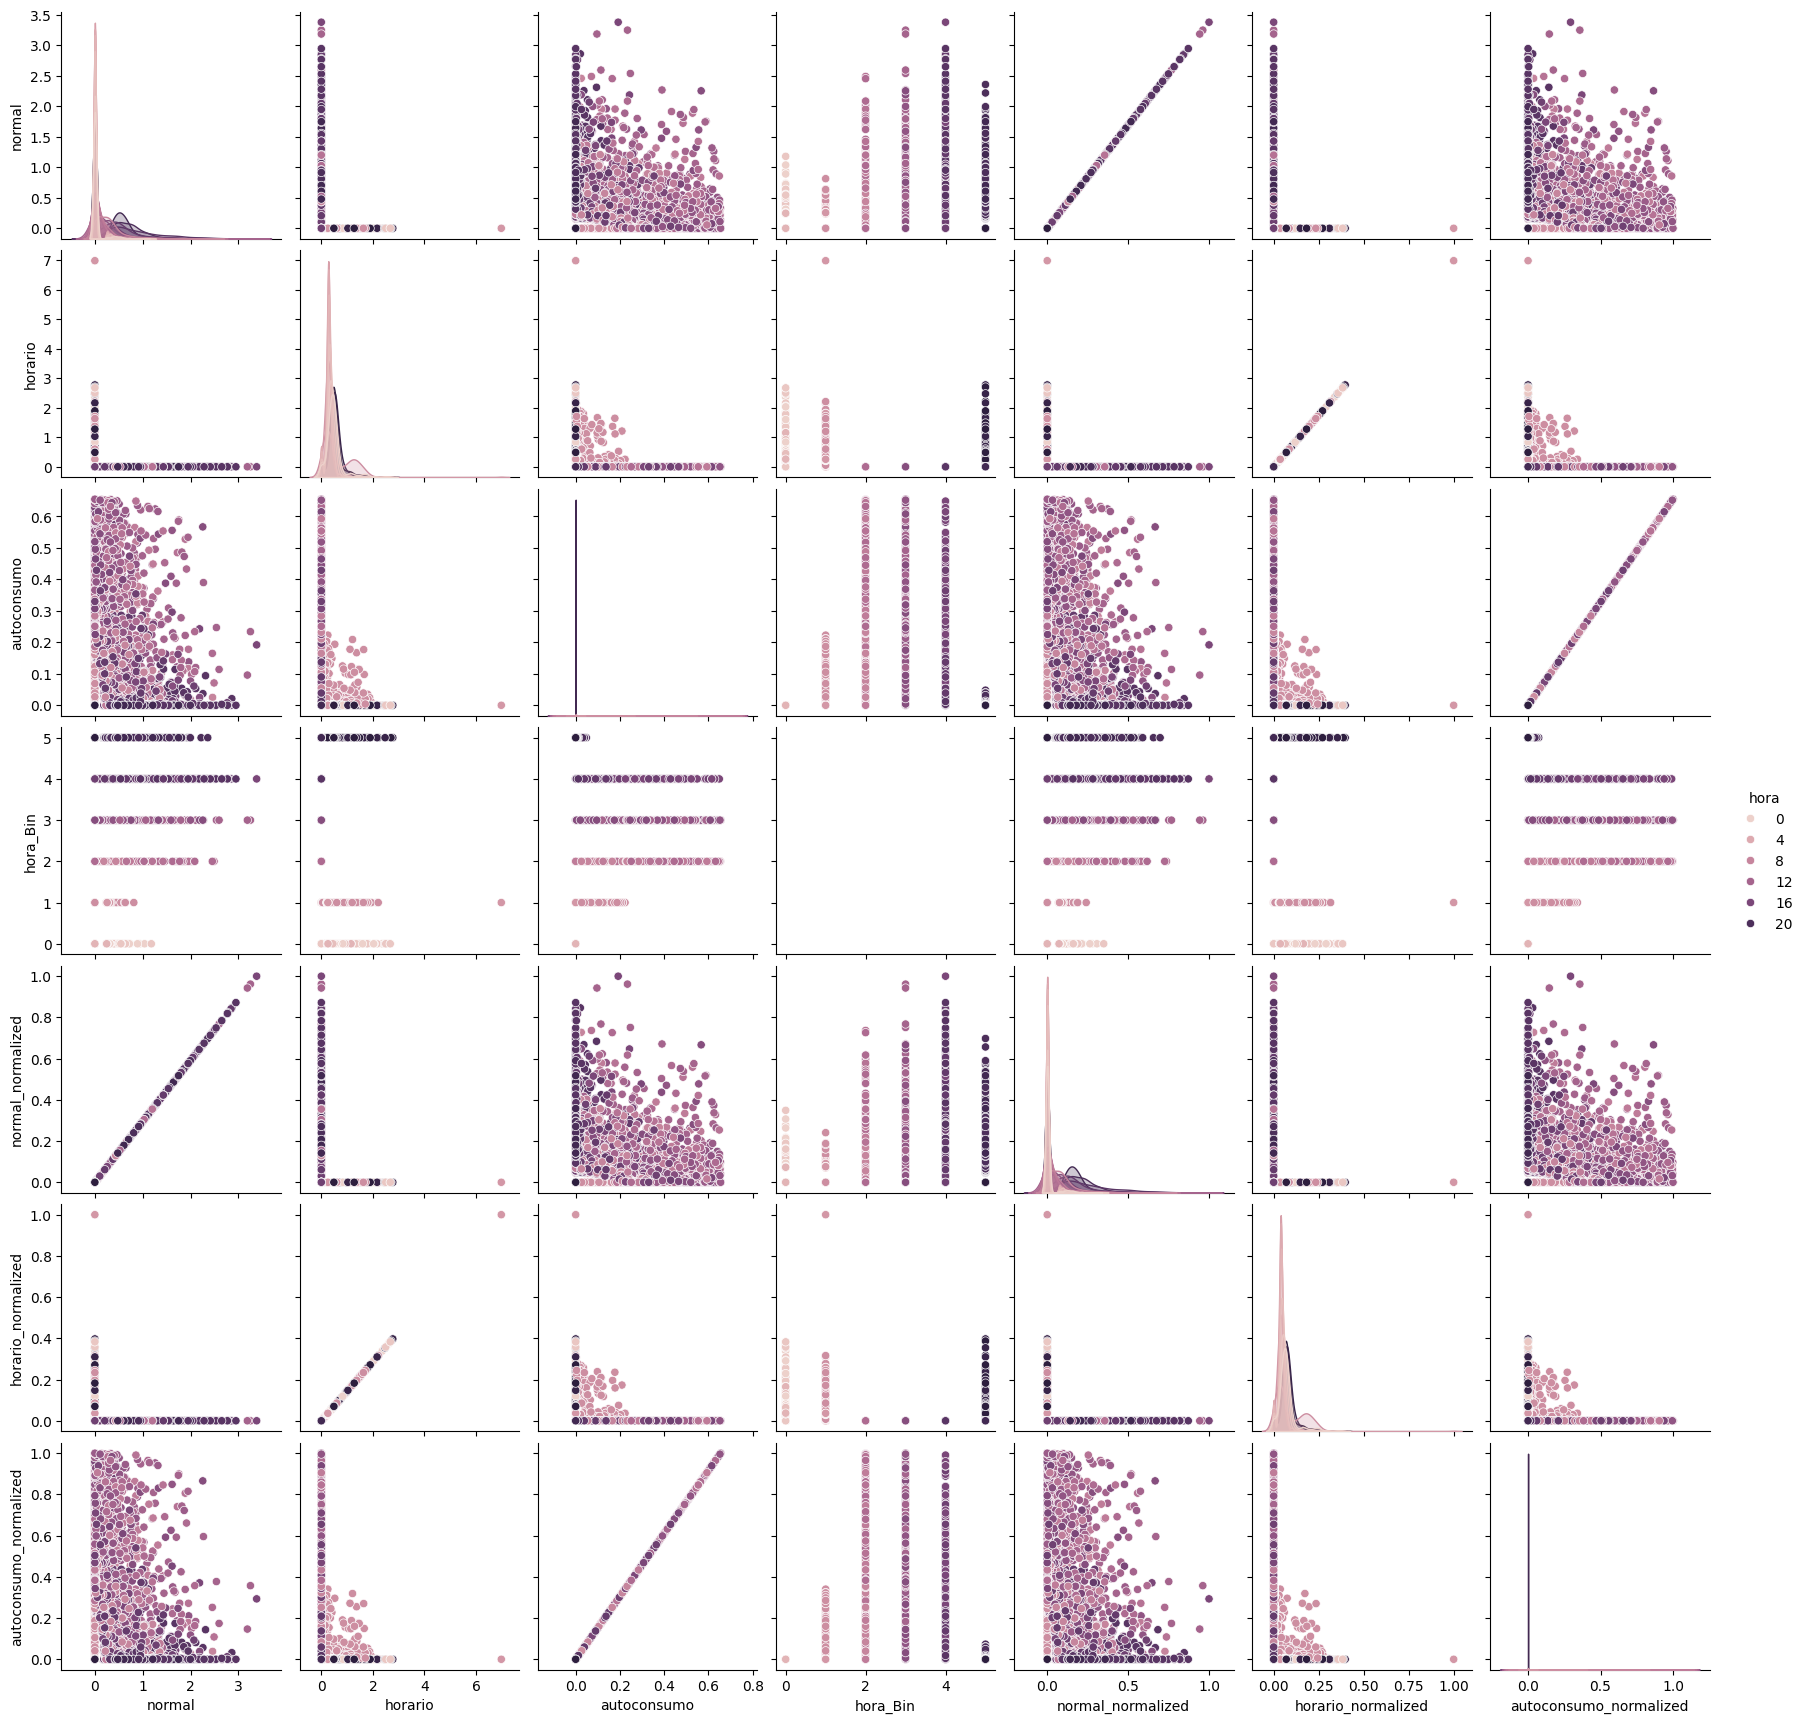

In [17]:
sns.pairplot(merged_dataset, hue='hora')
plt.show()

In [19]:
print(merged_dataset)

            Data  hora  normal  horario  autoconsumo Injeção na rede (kWh)  \
0     2021-09-29     0   0.000    0.000        0.000                   NaN   
1     2021-09-29     1   0.000    0.000        0.000                   NaN   
2     2021-09-29     2   0.000    0.000        0.000                   NaN   
3     2021-09-29     3   0.000    0.000        0.000                   NaN   
4     2021-09-29     4   0.000    0.000        0.000                   NaN   
...          ...   ...     ...      ...          ...                   ...   
2251  2023-04-04    19   0.953    0.000        0.012                   NaN   
2252  2023-04-04    20   0.915    0.000        0.000                   NaN   
2253  2023-04-04    21   0.479    0.000        0.000                   NaN   
2254  2023-04-04    22   0.000    0.497        0.000                   NaN   
2255  2023-04-04    23   0.000    0.487        0.000                   NaN   

      hora_Bin  normal_normalized  horario_normalized  autocons